In [58]:
# Load dataset
import pandas as pd
df = pd.read_csv("datasets/Student_Performance.csv", index_col=False)
# Clean the dataset in such a way that every column should have integer values
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1, "No": 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [85]:
# create target data
y = df["Performance Index"].to_numpy()
y

array([91., 65., 45., ..., 74., 95., 64.], shape=(10000,))

In [73]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, shuffle=True, test_size=0.30)

In [118]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [87]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
x_train

array([[ 0.39517091, -0.42994802,  1.01903834, -1.4915884 ,  1.18369572,
        -0.37403107],
       [-1.54085678,  0.43968794,  1.01903834,  1.462052  ,  0.13877537,
        -0.05978841],
       [-1.54085678,  0.49766367, -0.98131735,  1.462052  ,  0.83538894,
        -0.11216219],
       ...,
       [-1.15365124,  0.20778502,  1.01903834, -1.4915884 ,  1.18369572,
        -0.42640485],
       [-1.15365124,  1.4832511 ,  1.01903834, -0.90086032,  0.83538894,
         1.19718226],
       [-1.15365124, -1.18363252, -0.98131735,  0.87132392,  0.13877537,
        -1.57862796]], shape=(7000, 6))

In [119]:
x_train

array([[ 0.39517091, -0.42994802,  1.01903834, -1.4915884 ,  1.18369572,
        -0.37403107],
       [-1.54085678,  0.43968794,  1.01903834,  1.462052  ,  0.13877537,
        -0.05978841],
       [-1.54085678,  0.49766367, -0.98131735,  1.462052  ,  0.83538894,
        -0.11216219],
       ...,
       [-1.15365124,  0.20778502,  1.01903834, -1.4915884 ,  1.18369572,
        -0.42640485],
       [-1.15365124,  1.4832511 ,  1.01903834, -0.90086032,  0.83538894,
         1.19718226],
       [-1.15365124, -1.18363252, -0.98131735,  0.87132392,  0.13877537,
        -1.57862796]], shape=(7000, 6))

In [75]:
# create Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [93]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
model.score(x_train, y_train)

1.0

In [84]:
#Mean Squared error for the trained model
mse = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=10)

In [78]:
import numpy as np
np.mean(mse)

np.float64(-1.2254832069759558e-14)

In [79]:
prediction = model.predict(x_test)
prediction

array([23., 56., 61., ..., 31., 74., 62.], shape=(3000,))

In [113]:
x_test

array([[-0.37924017, -1.58946264,  1.01903834, -0.31013224, -0.20953141,
        -1.68337552],
       [-1.15365124,  0.55563941,  1.01903834, -1.4915884 ,  0.13877537,
         0.04495915],
       [-1.15365124,  0.7295666 ,  1.01903834, -0.90086032, -0.55783819,
         0.30682804],
       ...,
       [ 1.16958198, -1.7054141 , -0.98131735, -1.4915884 , -0.55783819,
        -1.2643853 ],
       [ 0.39517091,  1.13539672, -0.98131735, -1.4915884 , -0.90614497,
         0.98768715],
       [ 0.78237644,  0.03385783,  1.01903834, -1.4915884 , -0.20953141,
         0.35920181]], shape=(3000, 6))

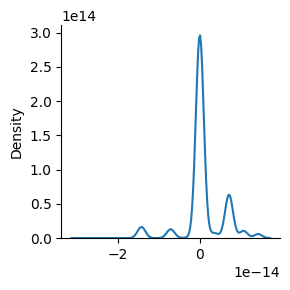

In [120]:
import seaborn as sb
sb.displot(prediction-y_test, kind='kde', height=3)

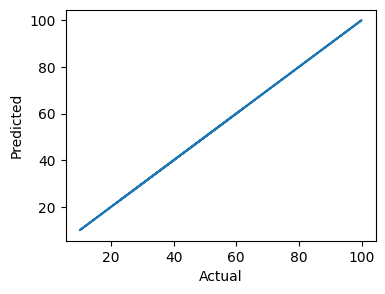

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=[4, 3])
plt.plot(prediction, y_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.show()
